In [16]:
# a1=0
# b1=0
# a2=100
# b2=0
# a3=50
# b3=50
import numpy as np
import math

def shrink_triangle(v1, v2, v3, margin):
    # Calculate the centroid of the triangle
    centroid = np.mean([v1, v2, v3], axis=0)
    
    # Define a function to move a point towards the centroid by a given margin
    def move_point_towards_centroid(point, centroid, margin):
        # Calculate the direction vector from the point to the centroid
        direction_vector = centroid - point
        # Normalize the direction vector
        norm = np.linalg.norm(direction_vector)
        if norm == 0:
            return point  # In case the point is already at the centroid
        normalized_direction_vector = direction_vector / norm
        # Calculate the new point that is 'margin' distance closer to the centroid
        new_point = point + margin * normalized_direction_vector
        return new_point
    
    # Move each vertex towards the centroid by the margin
    new_v1 = move_point_towards_centroid(v1, centroid, margin)
    new_v2 = move_point_towards_centroid(v2, centroid, margin)
    new_v3 = move_point_towards_centroid(v3, centroid, margin)
    
    return new_v1, new_v2, new_v3

# Example usage:
vertex1 = np.array([0, 0])
vertex2 = np.array([200, 0])
vertex3 = np.array([100, 100])
margin = 0.1  # Example margin

shrinked_v1, shrinked_v2, shrinked_v3 = shrink_triangle(vertex1, vertex2, vertex3, margin)

In [17]:
import numpy as np
import math
def calculate_distance(x, y, a, b):
    """Calculate the Euclidean distance between two points (x, y) and (a, b)."""
    return math.sqrt((a - x) ** 2 + (b - y) ** 2)
def getRandomSamples(x0, y0, x1, y1, x2, y2, n_points):
    # Coordinates of the triangle's vertices
    point0 = np.array([x0, y0])
    point1 = np.array([x1, y1])
    point2 = np.array([x2, y2])
    
    # Vectors from point 0 to point 1 and from point 0 to point 2
    e0 = point1 - point0
    e1 = point2 - point0
    
    # List to store the random points
    randomPoints = []
    
    for _ in range(n_points):
        # Generate random x, y in the range [0, 1]
        x, y = np.random.rand(2)
        # Ensure the random point (x, y) lies within the triangle
        if x + y > 1:
            x = 1 - x
            y = 1 - y

        # Calculate a random point within the triangle
        randomPoint = point0 + e0 * x + e1 * y
        randomPoints.append(randomPoint)
    
    return randomPoints
n_points = 45000  # Number of random points to generate
coordinates = getRandomSamples(shrinked_v1[0], shrinked_v1[1], shrinked_v2[0], shrinked_v2[1], shrinked_v3[0], shrinked_v3[1], n_points)
coordinates = np.vstack(coordinates)

# # Define the ranges and step size
# x_range = (20.05, 30.7)
# y_range = (5.05, 20.7)
# step_size = 0.1

# # Generate the coordinate arrays
# x_values = np.arange(x_range[0], x_range[1] + step_size, step_size)
# y_values = np.arange(y_range[0], y_range[1] + step_size, step_size)

# # Create a mesh grid and then flatten the arrays to get all combinations
# x_mesh, y_mesh = np.meshgrid(x_values, y_values)
# coordinates = np.array([x_mesh.flatten(), y_mesh.flatten()]).T


In [18]:
# import math

# def calculate_distance(x, y, a, b):
#     """Calculate the Euclidean distance between two points (x, y) and (a, b)."""
#     return math.sqrt((a - x) ** 2 + (b - y) ** 2)

In [19]:
# #随机生成坐标值
# # Redefine the ranges and step size
# x_range = (35.05, 55.7)
# y_range = (35.05, 55.7)
# step_size = 0.1

# # Generate the coordinate arrays
# x_values = np.arange(x_range[0], x_range[1] + step_size, step_size)
# y_values = np.arange(y_range[0], y_range[1] + step_size, step_size)

# # Create a mesh grid and then flatten the arrays to get all combinations
# x_mesh, y_mesh = np.meshgrid(x_values, y_values)
# coordinates = np.array([x_mesh.flatten(), y_mesh.flatten()]).T

# Generate random distances in the range (0.0, 0.05)
random_distances = np.random.uniform(0.0, 0.05, size=(len(coordinates),))

# Generate random angles in the range (0, 2*pi)
random_angles = np.random.uniform(0, 2*np.pi, size=(len(coordinates),))

# Convert polar coordinates to cartesian coordinates for the second point
delta_x = random_distances * np.cos(random_angles)
delta_y = random_distances * np.sin(random_angles)

# Create the second set of coordinates
new_x_values = coordinates[:, 0] + delta_x
new_y_values = coordinates[:, 1] + delta_y

# Combine the original and new coordinates to form a 4D vector
result_array = np.column_stack((coordinates[:, 0], coordinates[:, 1], new_x_values, new_y_values))

# Reshape the array to have shape (11236, 4)
result_array = result_array.reshape((len(coordinates), 4))

result_array.shape

(45000, 4)

In [20]:
import random
w = np.zeros([n_points,2])
v = np.zeros([n_points,2])
for i in range(n_points):
    x = result_array[i][0]
    y = result_array[i][1]
    x1 = result_array[i][2]
    y1 = result_array[i][3]
    d11 = calculate_distance(x,y,vertex1[0],vertex1[1])
    d12 = calculate_distance(x1,y1,vertex1[0],vertex1[1])
    d21 = calculate_distance(x,y,vertex2[0],vertex2[1])
    d22 = calculate_distance(x1,y1,vertex2[0],vertex2[1])
    d31 = calculate_distance(x,y,vertex3[0],vertex3[1])
    d32 = calculate_distance(x1,y1,vertex3[0],vertex3[1])
    dd12 = np.abs(d11+d21-d12-d22)
    dd13 = np.abs(d11+d31-d12-d32)
    w12 = 2*6*10e9*3.14*dd12/(3*10e8)
    w13 = 2*6*10e9*3.14*dd13/(3*10e8)
    v12 = (6*10e9/(3*10e8))*dd12*100
    v13 = (6*10e9/(3*10e8))*dd13*100
    w[i][0] = w12
    w[i][1] = w13
    v[i][0] = v12
    v[i][1] = v13

In [21]:
import numpy as np

def generate_super_complex_curve():
    # 生成横坐标在35到55之间的点
    x_values = np.arange(35, 55, 0.01)

    # 生成复杂的纵坐标点
    y_values = (
        40 + 10 * np.sin((x_values - 35) / 5) +
        5 * np.cos((x_values - 40) / 5) +
        3 * np.sin((x_values - 45) / 2) +
        2 * np.exp((x_values - 50) / 10)
    )

    # 保证相邻点之间的距离小于0.05
    x_points = []
    y_points = []

    for i in range(len(x_values) - 1):
        x_points.append(x_values[i])
        y_points.append(y_values[i])

        # 计算当前点与下一个点之间的距离
        distance = np.sqrt((x_values[i + 1] - x_values[i]) ** 2 + (y_values[i + 1] - y_values[i]) ** 2)

        # 如果距离大于0.05，则插入新点，使距离小于0.05
        while distance > 0.05:
            x_new = (x_values[i] + x_values[i + 1]) / 2
            y_new = (y_values[i] + y_values[i + 1]) / 2

            x_points.append(x_new)
            y_points.append(y_new)

            distance = np.sqrt((x_values[i + 1] - x_new) ** 2 + (y_values[i + 1] - y_new) ** 2)

    return x_points, y_points

# 获取采样点
x_points, y_points = generate_super_complex_curve()

In [22]:
result_test = np.zeros([len(x_points)-1,4])
for i in range(len(x_points)-2):
    result_test[i][0]=x_points[i]
    result_test[i][1]=y_points[i]
    result_test[i][2]=x_points[i+1]
    result_test[i][3]=y_points[i+1]

In [23]:
import random
inputs_t = np.zeros([len(x_points)-1,4])
for i in range(len(x_points)-2):
    x = result_test[i][0]
    y = result_test[i][1]
    x1 = result_test[i][2]
    y1 = result_test[i][3]
    d11 = calculate_distance(x,y,vertex1[0],vertex1[1])
    d12 = calculate_distance(x1,y1,vertex1[0],vertex1[1])
    d21 = calculate_distance(x,y,vertex2[0],vertex2[1])
    d22 = calculate_distance(x1,y1,vertex2[0],vertex2[1])
    d31 = calculate_distance(x,y,vertex3[0],vertex3[1])
    d32 = calculate_distance(x1,y1,vertex3[0],vertex3[1])
    dd12 = np.abs(d11+d21-d12-d22)
    dd13 = np.abs(d11+d31-d12-d32)
    w12 = 2*6*10e9*3.14*dd12/(3*10e8)
    w13 = 2*6*10e9*3.14*dd13/(3*10e8)
    v12 = (6*10e9/(3*10e8))*dd12*100
    v13 = (6*10e9/(3*10e8))*dd13*100
    inputs_t[i][0] = w12
    inputs_t[i][1] = w13
    inputs_t[i][2] = v12
    inputs_t[i][3] = v13

c:\ProgramData\miniconda3\Lib\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/500], Loss: 1596.1929931640625
Epoch [2/500], Loss: 588.90478515625
Epoch [3/500], Loss: 364.7696838378906
Epoch [4/500], Loss: 542.0144653320312
Epoch [5/500], Loss: 252.74188232421875
Epoch [6/500], Loss: 1099.2725830078125
Epoch [7/500], Loss: 640.4336547851562
Epoch [8/500], Loss: 1220.639892578125
Epoch [9/500], Loss: 446.5159606933594
Epoch [10/500], Loss: 543.799072265625
Epoch [11/500], Loss: 1603.9456787109375
Epoch [12/500], Loss: 855.1118774414062
Epoch [13/500], Loss: 493.8825988769531
Epoch [14/500], Loss: 145.93331909179688
Epoch [15/500], Loss: 278.4568786621094
Epoch [16/500], Loss: 565.2733154296875
Epoch [17/500], Loss: 451.56976318359375
Epoch [18/500], Loss: 411.8240661621094
Epoch [19/500], Loss: 2096.915283203125
Epoch [20/500], Loss: 601.646240234375
Epoch [21/500], Loss: 809.320556640625
Epoch [22/500], Loss: 1139.7554931640625
Epoch [23/500], Loss: 93.27949523925781
Epoch [24/500], Loss: 751.8741455078125
Epoch [25/500], Loss: 651.6456909179688
Epoch [

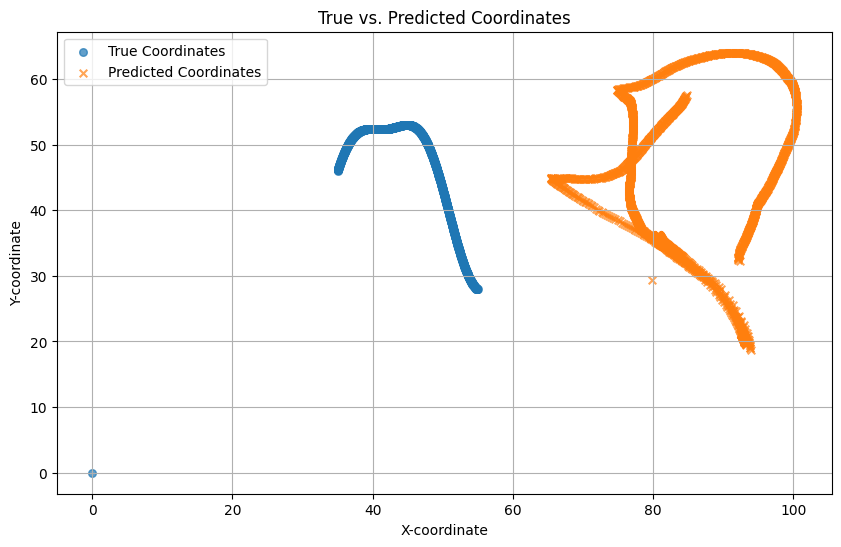

Test Loss: 968.0637149600773


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import matplotlib.pyplot as plt
inputs = np.concatenate((w, v), axis=1)  # 将 w 和 v 拼接
inputs_train = inputs
coords_train = result_array
inputs_test = inputs_t
coords_test = result_test
# 定义一个 PyTorch 数据集
class CoordDataset(Dataset):
    def __init__(self, inputs, coords):
        # 确保 inputs 和 coords 都是 torch.float32 类型
        self.inputs = torch.tensor(inputs, dtype=torch.float32)
        self.coords = torch.tensor(coords, dtype=torch.float32)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.coords[idx]

# 创建训练和测试数据集
train_dataset = CoordDataset(inputs_train, coords_train)
test_dataset = CoordDataset(inputs_test, coords_test)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)


# 将 numpy 数组转换为 torch 张量
inputs_train = torch.tensor(inputs_train, dtype=torch.float32)
coords_train = torch.tensor(coords_train, dtype=torch.float32)
inputs_test = torch.tensor(inputs_test, dtype=torch.float32)
coords_test = torch.tensor(coords_test, dtype=torch.float32)
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, nhead, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        encoder_layers = TransformerEncoderLayer(hidden_size, nhead, hidden_size, dropout)
        self.transformer = TransformerEncoder(encoder_layers, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x)
        return x

model = TransformerModel(input_size=4, hidden_size=128, output_size=4, num_layers=2, nhead=8, dropout=0.2)

# 损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
epochs = 500

for epoch in range(epochs):
    for inputs, coords in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, coords)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

model.eval()  # 设置模型为评估模式
total_test_loss = 0
predicted_coords = []
true_coords = []
with torch.no_grad():
    for inputs, coords in test_loader:
        outputs = model(inputs)
        test_loss = criterion(outputs, coords)
        total_test_loss += test_loss.item()
        predicted_coords.append(outputs.numpy())
        true_coords.append(coords.numpy())
# 合并所有批次的预测结果和真实值
predicted_coords = np.concatenate(predicted_coords, axis=0)
true_coords = np.concatenate(true_coords, axis=0)
# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(true_coords[:, 0], true_coords[:, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
plt.scatter(predicted_coords[:, 0], predicted_coords[:, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('True vs. Predicted Coordinates')
plt.grid(True)
plt.show()
print(f'Test Loss: {total_test_loss /len(test_loader)}')

In [25]:
d1 = 0
d2 = 0
for i in range(len(true_coords)-1):
    x = true_coords[i, 0]
    y = true_coords[i, 1]
    x1 = predicted_coords[i, 0]
    y1 = predicted_coords[i, 1]
    d11 = calculate_distance(x,y,a1,b1)
    d12 = calculate_distance(x1,y1,a1,b1)
    d21 = calculate_distance(x,y,a2,b2)
    d22 = calculate_distance(x1,y1,a2,b2)
    d31 = calculate_distance(x,y,a3,b3)
    d32 = calculate_distance(x1,y1,a3,b3)
    dd12 = np.abs(d11+d21-d12-d22)
    dd13 = np.abs(d11+d31-d12-d32)
    d1 = d1+dd12
    d2 = d2+dd13

NameError: name 'a1' is not defined

: 

In [ ]:
d2/len(true_coords)

: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import matplotlib.pyplot as plt
inputs = np.concatenate((w[:17063], v[:17063]), axis=1)  # 将 w 和 v 拼接
inputs_train, inputs_test, coords_train, coords_test = train_test_split(inputs, target_coords, test_size=0.2, random_state=42)
# 定义一个 PyTorch 数据集
class CoordDataset(Dataset):
    def __init__(self, inputs, coords):
        # 确保 inputs 和 coords 都是 torch.float32 类型
        self.inputs = torch.tensor(inputs, dtype=torch.float32)
        self.coords = torch.tensor(coords, dtype=torch.float32)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.coords[idx]

# 创建训练和测试数据集
train_dataset = CoordDataset(inputs_train, coords_train)
test_dataset = CoordDataset(inputs_test, coords_test)

# 创建 DataLoader
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)


# 将 numpy 数组转换为 torch 张量
inputs_train = torch.tensor(inputs_train, dtype=torch.float32)
coords_train = torch.tensor(coords_train, dtype=torch.float32)
inputs_test = torch.tensor(inputs_test, dtype=torch.float32)
coords_test = torch.tensor(coords_test, dtype=torch.float32)
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, nhead, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        encoder_layers = TransformerEncoderLayer(hidden_size, nhead, hidden_size, dropout)
        self.transformer = TransformerEncoder(encoder_layers, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x)
        return x

model = TransformerModel(input_size=4, hidden_size=128, output_size=12, num_layers=2, nhead=8, dropout=0.2)


# 损失函数和优化器

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
epochs = 100

for epoch in range(epochs):
    for inputs, coords in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, coords)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

model.eval()  # 设置模型为评估模式
total_test_loss = 0
predicted_coords = []
true_coords = []
with torch.no_grad():
    for inputs, coords in test_loader:
        outputs = model(inputs)
        test_loss = criterion(outputs, coords)
        total_test_loss += test_loss.item()
        predicted_coords.append(outputs.numpy())
        true_coords.append(coords.numpy())
# 合并所有批次的预测结果和真实值
predicted_coords = np.concatenate(predicted_coords, axis=0)
true_coords = np.concatenate(true_coords, axis=0)
# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(true_coords[:, 0], true_coords[:, 1], label='True Coordinates', marker='o', s=30, alpha=0.7)
plt.scatter(predicted_coords[:, 0], predicted_coords[:, 1], label='Predicted Coordinates', marker='x', s=30, alpha=0.7)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('True vs. Predicted Coordinates')
plt.grid(True)
plt.show()
print(f'Test Loss: {total_test_loss /len(test_loader)}')

: 

In [ ]:
inputs = np.concatenate((w[:17063], v[:17063]), axis=1)

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_curve():
    # 生成横坐标在35到55之间的点
    x_values = np.arange(35, 55, 0.1)

    # 生成波动在35到50之间的纵坐标点
    y_values = 35 + 15 * np.sin((x_values - 35) / 20 * np.pi)

    return x_values, y_values

# 获取采样点
x_points, y_points = generate_curve()

# 绘制曲线
plt.plot(x_points, y_points, label='二维曲线')
plt.xlabel('横坐标')
plt.ylabel('纵坐标')
plt.title('二维曲线函数')
plt.legend()
plt.show()


: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_super_complex_curve():
    # 生成横坐标在35到55之间的点
    x_values = np.arange(35, 55, 0.01)

    # 生成复杂的纵坐标点
    y_values = (
        40 + 10 * np.sin((x_values - 35) / 5) +
        5 * np.cos((x_values - 40) / 5) +
        3 * np.sin((x_values - 45) / 2) +
        2 * np.exp((x_values - 50) / 10)
    )

    # 保证相邻点之间的距离小于0.05
    x_points = []
    y_points = []

    for i in range(len(x_values) - 1):
        x_points.append(x_values[i])
        y_points.append(y_values[i])

        # 计算当前点与下一个点之间的距离
        distance = np.sqrt((x_values[i + 1] - x_values[i]) ** 2 + (y_values[i + 1] - y_values[i]) ** 2)

        # 如果距离大于0.05，则插入新点，使距离小于0.05
        while distance > 0.05:
            x_new = (x_values[i] + x_values[i + 1]) / 2
            y_new = (y_values[i] + y_values[i + 1]) / 2

            x_points.append(x_new)
            y_points.append(y_new)

            distance = np.sqrt((x_values[i + 1] - x_new) ** 2 + (y_values[i + 1] - y_new) ** 2)

    return x_points, y_points

# 获取采样点
x_points, y_points = generate_super_complex_curve()

# 绘制曲线
plt.plot(x_points, y_points, label='超级复杂二维曲线')
plt.xlabel('横坐标')
plt.ylabel('纵坐标')
plt.title('超级复杂二维曲线函数（相邻点距离小于0.05）')
plt.legend()
plt.show()



: 

: 